<a href="https://colab.research.google.com/github/Daeton1/CIS_2100_project3_v2/blob/main/project_3_V2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Define the Product class
class Product:
    def __init__(self, name, price):
        self.name = name
        self.price = price

# Define the Order class
class Order:
    def __init__(self, order_id):
        self.order_id = order_id
        self.products = []

    def add_product(self, product):
        self.products.append(product)

    def total_price(self):
        return sum(product.price for product in self.products)

# Define the Customer class
class Customer:
    def __init__(self, customer_id):
        self.customer_id = customer_id
        self.orders = []

    def create_order(self, order):
        self.orders.append(order)

# Define the Store class
class Store:
    def __init__(self, store_id):
        self.store_id = store_id
        self.customers = []

    def add_customer(self, customer):
        self.customers.append(customer)

# Define the Corporation class
class Corporation:
    def __init__(self, name):
        self.name = name
        self.stores = []

    def add_store(self, store):
        self.stores.append(store)

    def generate_sales_data(self):
        sales_data = []
        for store in self.stores:
            for customer in store.customers:
                for order in customer.orders:
                    for product in order.products:
                        sales_data.append({
                            "Date": (datetime.now() - timedelta(days=random.randint(0, 365))).strftime("%Y-%m-%d"),
                            "Time": f"{random.randint(8, 20)}:{random.randint(0, 59):02d}",
                            "StoreID": store.store_id,
                            "CustomerID": customer.customer_id,
                            "OrderID": order.order_id,
                            "Product Name": product.name,
                            "Price": product.price
                        })
        return sales_data

# Simulate the Corporation
corporation = Corporation("Digital Twin Corp")

# Define sample stores
store_ids = ["Store_001", "Store_002", "Store_003"]
for store_id in store_ids:
    store = Store(store_id)
    corporation.add_store(store)

    # Define sample customers
    for i in range(1, 6):  # 5 customers per store
        customer = Customer(f"Customer_{store_id}_{i}")
        store.add_customer(customer)

        # Define sample orders for each customer
        for j in range(1, 4):  # 3 orders per customer
            order = Order(f"Order_{customer.customer_id}_{j}")

            # Define sample products for each order
            products = [
                Product("Laptop", 1200),
                Product("Smartphone", 800),
                Product("Headphones", 200),
                Product("TV", 1500),
                Product("Tablet", 500),
                Product("Camera", 700),
                Product("Smartwatch", 300)
            ]
            for _ in range(random.randint(1, 5)):  # Randomly add 1-5 products per order
                order.add_product(random.choice(products))

            customer.create_order(order)

# Generate sales data and write to a CSV file
sales_data = corporation.generate_sales_data()
sales_df = pd.DataFrame(sales_data)
sales_df.to_csv("sales_data.csv", index=False)

print("Sales data has been written to 'sales_data.csv'.")


Sales data has been written to 'sales_data.csv'.


Most Prevalent Products in Customer Baskets:
Product Name
Smartphone    26
Laptop        20
Headphones    20
Smartwatch    20
Camera        16
Name: count, dtype: int64

Frequency of Large Buyers (Customers with Large Baskets):
CustomerID
Customer_Store_001_3    2
Customer_Store_001_5    2
Customer_Store_003_3    2
Customer_Store_001_2    1
Customer_Store_001_4    1
Name: count, dtype: int64

Stores Containing Large-Basket Buyers:
StoreID
Store_001    38
Store_002    35
Store_003    35
dtype: int64


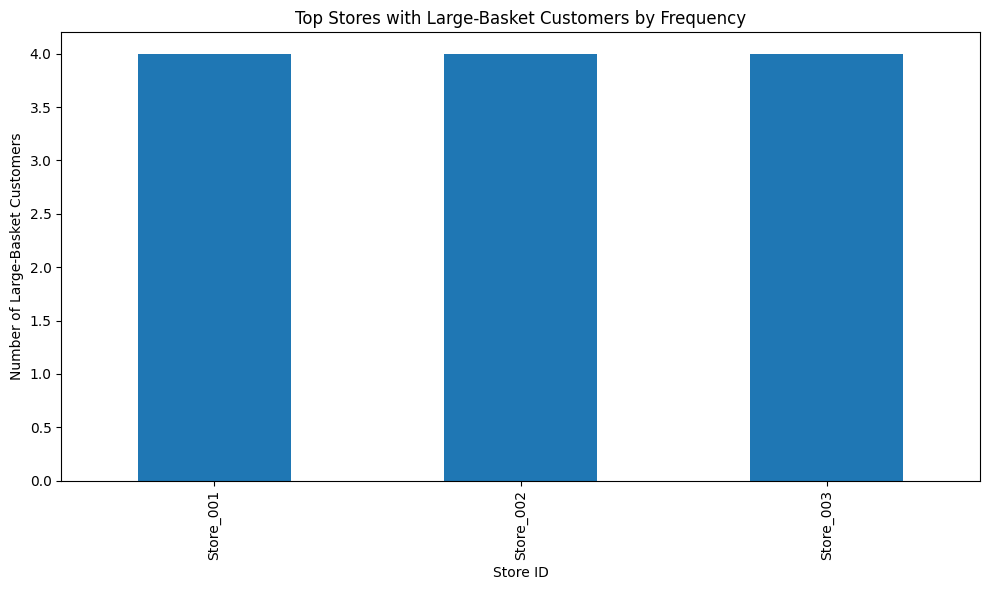


Top Products for Large-Basket Customers:
Product Name
Smartphone    23
Smartwatch    17
Headphones    16
Laptop        15
Tablet        14
Name: count, dtype: int64

Categorical Makeup of Large-Basket Buyers' Baskets:
Product Name
Smartphone    0.212963
Smartwatch    0.157407
Headphones    0.148148
Laptop        0.138889
Tablet        0.129630
Camera        0.111111
TV            0.101852
Name: proportion, dtype: float64


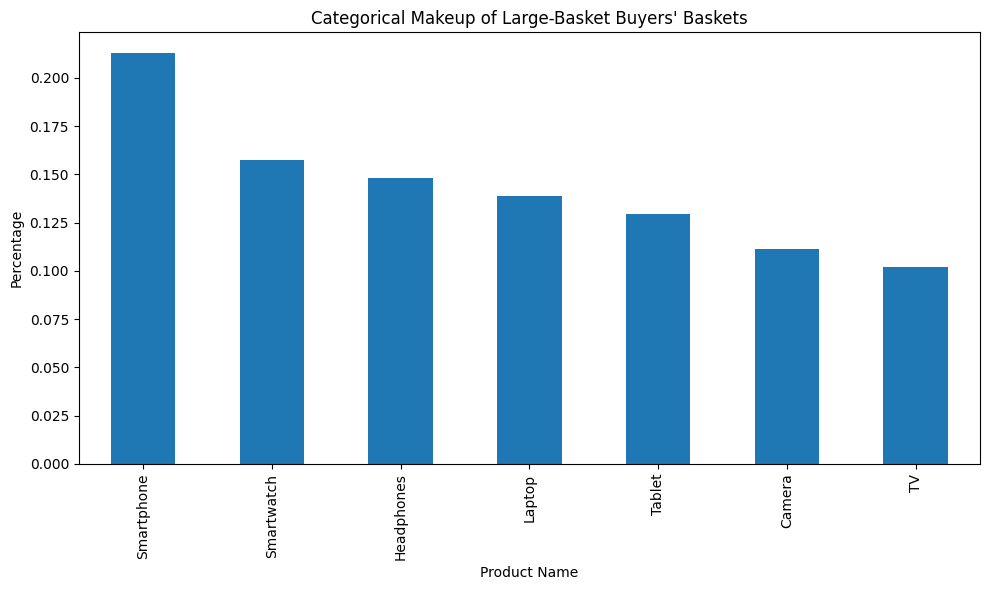

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sales data (ensure the CSV file exists in your working directory)
sales_df = pd.read_csv("sales_data.csv")

# 1. Most prevalent products in customer baskets
most_prevalent_products = sales_df["Product Name"].value_counts()
print("Most Prevalent Products in Customer Baskets:")
print(most_prevalent_products.head(5))

# 2. Frequency of large buyers (customers with large baskets, e.g., >3 items per order)
basket_sizes = sales_df.groupby(["CustomerID", "OrderID"]).size()
large_basket_buyers = basket_sizes[basket_sizes > 3].reset_index()
large_basket_buyers.columns = ["CustomerID", "OrderID", "BasketSize"]
large_basket_frequencies = large_basket_buyers["CustomerID"].value_counts()
print("\nFrequency of Large Buyers (Customers with Large Baskets):")
print(large_basket_frequencies.head(5))

# 3. Stores containing large-basket buyers
large_basket_store_counts = sales_df[sales_df["CustomerID"].isin(large_basket_buyers["CustomerID"])].groupby("StoreID").size()
print("\nStores Containing Large-Basket Buyers:")
print(large_basket_store_counts)

# 4. Visualization of top large-basket customer stores by frequency
large_basket_store_frequencies = sales_df[sales_df["CustomerID"].isin(large_basket_buyers["CustomerID"])]
store_customer_frequency = large_basket_store_frequencies.groupby("StoreID")["CustomerID"].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
store_customer_frequency.plot(kind="bar", title="Top Stores with Large-Basket Customers by Frequency")
plt.ylabel("Number of Large-Basket Customers")
plt.xlabel("Store ID")
plt.tight_layout()
plt.show()

# 5. Top-n list of products for large-basket customers
large_basket_products = sales_df[sales_df["CustomerID"].isin(large_basket_buyers["CustomerID"])]
top_products_large_basket = large_basket_products["Product Name"].value_counts()
print("\nTop Products for Large-Basket Customers:")
print(top_products_large_basket.head(5))

# 6. Categorical makeup of large-basket buyers' baskets
categorical_makeup = large_basket_products["Product Name"].value_counts(normalize=True)
print("\nCategorical Makeup of Large-Basket Buyers' Baskets:")
print(categorical_makeup)

# Visualization for item 6: Categorical makeup of their baskets
plt.figure(figsize=(10, 6))
categorical_makeup.plot(kind="bar", title="Categorical Makeup of Large-Basket Buyers' Baskets")
plt.ylabel("Percentage")
plt.xlabel("Product Name")
plt.tight_layout()
plt.show()
